<a href="https://colab.research.google.com/github/Mohamed-afk-lang/AI-Cancer-Dataset/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Deep Learning - CNN Classification
## Dataset: MNIST Handwritten Digits (from keras)

##### Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

##### Step 2: Load Dataset

In [2]:
# Load MNIST dataset from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### TODO: Normalize the images (divide by 255.0)


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

##### TODO: Reshape the data to include channel dimension (28,28,1)


In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

##### TODO: One-hot encode the labels using to_categorical


In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#####  Step 3: Explore Dataset


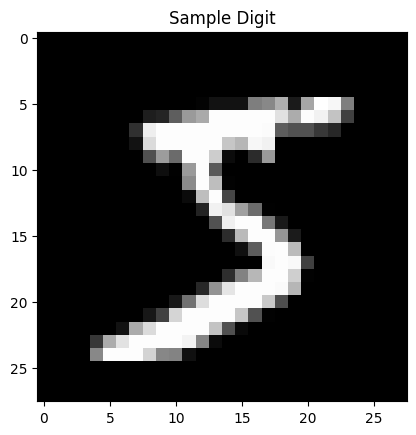

In [6]:
# Plot an example digit
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title("Sample Digit")
plt.show()

In [7]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (60000, 28, 28, 1) (60000, 10)
Test shape: (10000, 28, 28, 1) (10000, 10)



##### Step 4: Build CNN Model


In [8]:
model = Sequential()

##### TODO: Add a Conv2D layer with 32 filters, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)


In [9]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### TODO: Add a MaxPooling2D layer (pool_size=(2,2))


In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

##### TODO: Add another Conv2D layer with 64 filters and relu activation


In [11]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

##### TODO: Add another MaxPooling2D layer

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

##### TODO: Flatten the output

In [13]:
model.add(Flatten())

##### TODO: Add a Dense layer with 128 neurons and relu activation

In [14]:
model.add(Dense(128, activation='relu'))

##### TODO: Add Dropout layer (rate=0.5)

In [15]:
model.add(Dropout(0.5))

##### TODO: Add the output Dense layer with 10 neurons and softmax activation


In [16]:
model.add(Dense(10, activation='softmax'))

##### Compile the model

In [17]:
model.compile(optimizer='adam',   # Choose optimizer,'adam'
              loss='categorical_crossentropy',  # Choose loss function,'categorical_crossentropy'
              metrics=['accuracy'])       # Choose metrics, 'accuracy'   # Choose metrics, 'accuracy'

#####  Step 5: Train the Model



In [18]:
# Fit the model on training data -- 5 epochs, batch_size=128, validation_split=0.1
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.7974 - loss: 0.6478 - val_accuracy: 0.9825 - val_loss: 0.0590
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9690 - loss: 0.1032 - val_accuracy: 0.9865 - val_loss: 0.0474
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9789 - loss: 0.0713 - val_accuracy: 0.9883 - val_loss: 0.0387
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9820 - loss: 0.0584 - val_accuracy: 0.9893 - val_loss: 0.0361
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.9865 - loss: 0.0461 - val_accuracy: 0.9898 - val_loss: 0.0373


#####  Step 6: Evaluate the Model
##### - Evaluate model on test data

In [19]:

# Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.029724393039941788
Test Accuracy: 0.9896000027656555


#####  Step 7: Plot Training History
##### - Plot training and validation accuracy

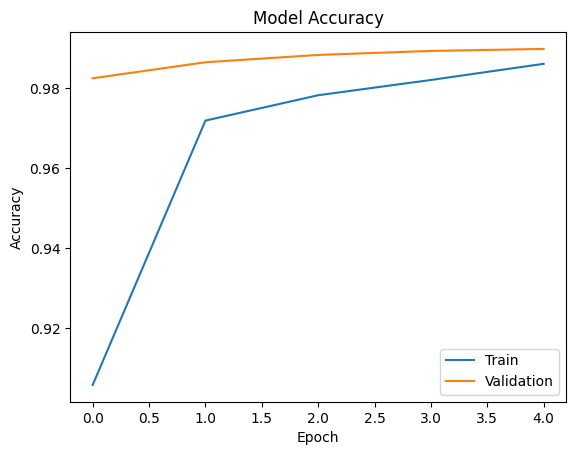

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

##### - Plot training and validation loss curves

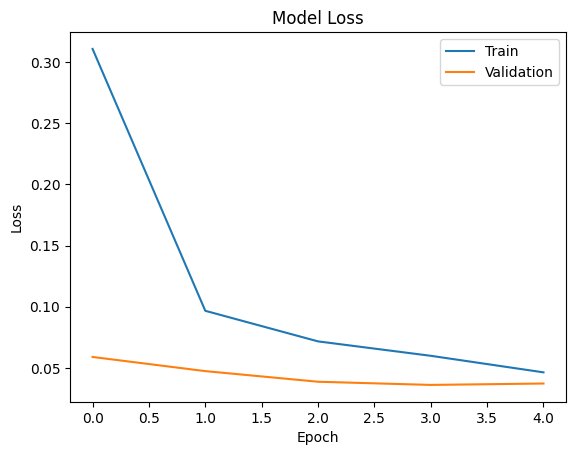

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()